In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Group 8- NYC Uber Data Analysis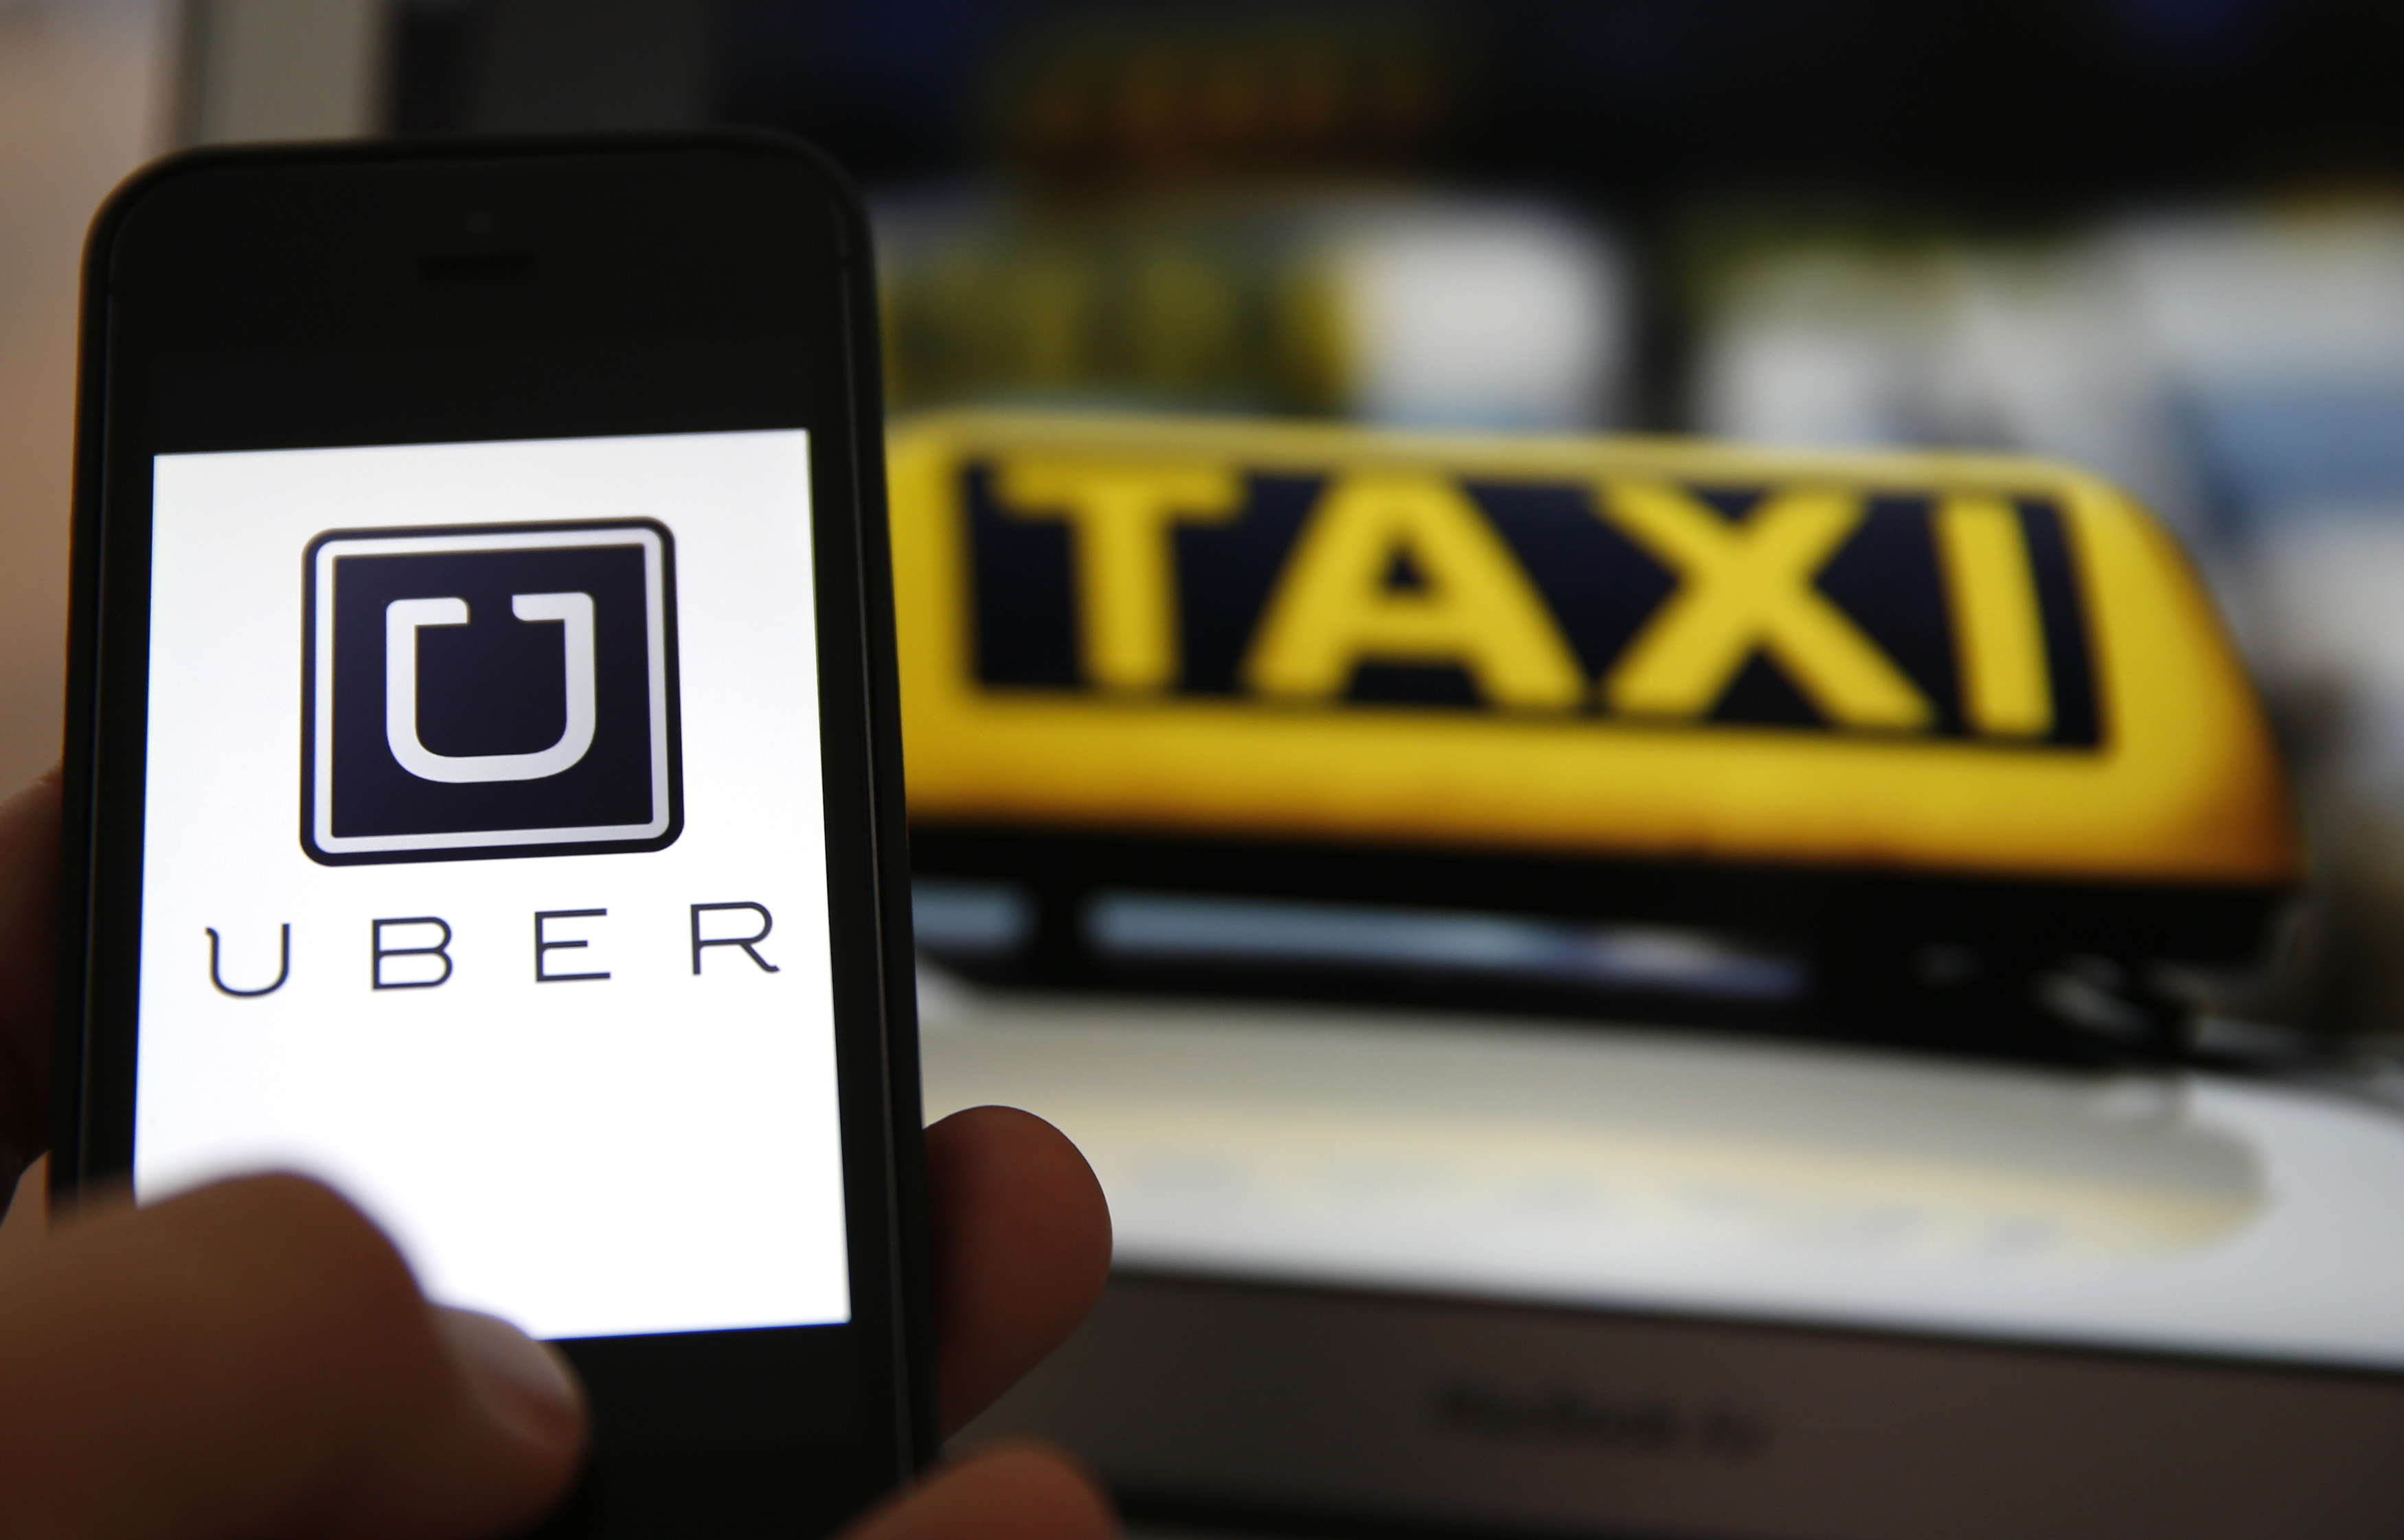

In [1]:
import pymysql
config = {
    'host':'127.0.0.1',
    'port':3306,
    'user':'root',
    'password':'123456',
    'db':'project',
    }
db = pymysql.connect(**config)
cursor = db.cursor()

## Data Cleaning

In [2]:
query = 'delete from uber where origin is null or destination is null'
cursor.execute(query)

0

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pal = sns.hls_palette(10, h = .5)
sns.set_palette(pal)


**Extreme trips which are longer than 50 hours**

In [4]:
#Unusual Trips i.e Trips above 50 hours
query = 'select duration from uber where TIME_TO_SEC(duration)/60 > 3000'
cursor.execute(query)
extreme = cursor.fetchall()
extreme

((datetime.timedelta(34, 82799),),
 (datetime.timedelta(4, 86015),),
 (datetime.timedelta(34, 82799),),
 (datetime.timedelta(2, 44918),),
 (datetime.timedelta(5, 59112),),
 (datetime.timedelta(34, 82799),),
 (datetime.timedelta(3, 17433),),
 (datetime.timedelta(5, 2945),),
 (datetime.timedelta(3, 70934),),
 (datetime.timedelta(2, 60169),),
 (datetime.timedelta(2, 79951),),
 (datetime.timedelta(34, 82799),),
 (datetime.timedelta(3, 82166),),
 (datetime.timedelta(3, 1720),))

In [5]:
len(extreme)

14

In [6]:
#long duration:>10 hours
query = 'select avg(TIME_TO_SEC(duration))/60 from uber where TIME_TO_SEC(duration)/60 < 600'
cursor.execute(query)
avg_duration = cursor.fetchall()
avg_duration[0][0]

Decimal('20.98606498')

In [7]:
#change the long duration into average duration except long duration
query = f'update uber set duration = {avg_duration[0][0]} where TIME_TO_SEC(duration)/60 > 600'
cursor.execute(query)

388

In [8]:
#average speed of all
query = 'select avg(distance/time_to_sec(duration)*3600) from uber'
cursor.execute(query)
avg_speed = cursor.fetchall()
avg_speed[0][0]

13.61295986913429

## Demand Based on Identified Patterns in the Time Series

In [10]:
#total trips per day
query = 'select date(pickup) d, count(*) from uber group by d'
cursor.execute(query)
total_per_day = cursor.fetchall()
total_per_day

((datetime.date(2014, 9, 1), 31594),
 (datetime.date(2014, 9, 2), 41497),
 (datetime.date(2014, 9, 3), 46339),
 (datetime.date(2014, 9, 4), 53402),
 (datetime.date(2014, 9, 5), 59719),
 (datetime.date(2014, 9, 6), 58838),
 (datetime.date(2014, 9, 7), 48884),
 (datetime.date(2014, 9, 8), 44044),
 (datetime.date(2014, 9, 9), 49290),
 (datetime.date(2014, 9, 10), 51165),
 (datetime.date(2014, 9, 11), 51729),
 (datetime.date(2014, 9, 12), 54207),
 (datetime.date(2014, 9, 13), 63363),
 (datetime.date(2014, 9, 14), 45368),
 (datetime.date(2014, 9, 15), 42154),
 (datetime.date(2014, 9, 16), 51279),
 (datetime.date(2014, 9, 17), 49389),
 (datetime.date(2014, 9, 18), 55343),
 (datetime.date(2014, 9, 19), 57042),
 (datetime.date(2014, 9, 20), 56122),
 (datetime.date(2014, 9, 21), 47145),
 (datetime.date(2014, 9, 22), 40467),
 (datetime.date(2014, 9, 23), 42806),
 (datetime.date(2014, 9, 24), 44447),
 (datetime.date(2014, 9, 25), 54119),
 (datetime.date(2014, 9, 26), 51994),
 (datetime.date(2014,

In [410]:
total_per_day = pd.read_sql_query('select date(pickup) day, count(*) total from uber group by day', db)

In [411]:
total_per_day.head()

,day,total
0,2014-09-01,31594
1,2014-09-02,41497
2,2014-09-03,46339
3,2014-09-04,53402
4,2014-09-05,59719


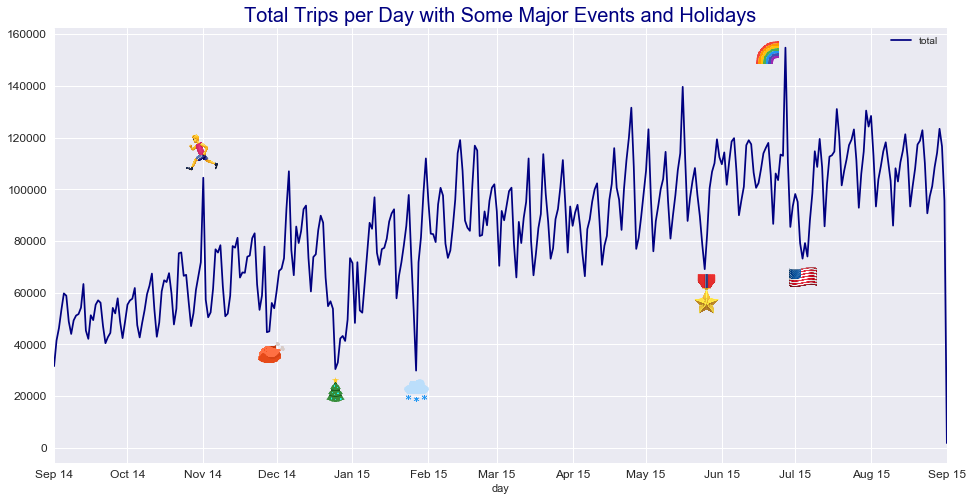

In [412]:
from matplotlib.dates import  DateFormatter, MonthLocator
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib._png import read_png
months = MonthLocator()
monthsFmt = DateFormatter("%b %y")
ax = total_per_day.set_index('day').plot(figsize = (16,8),fontsize = 12,color = 'navy')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.title('Total Trips per Day with Some Major Events and Holidays', fontsize= 20, color='navy')

img1 = read_png('pic/Snow-48.png')
imagebox = OffsetImage(img1, zoom=0.6)
xy = ['2015-01-27', total_per_day.total.loc[total_per_day['day'].astype(str)== '2015-01-27']]
ab = AnnotationBbox(imagebox, xy, 
                    xybox=(0., -20.), #position from xy to lower left corner of box
                    xycoords='data', #will use data coordinates for x and y
                    boxcoords='offset points', #same idea as textcoords, in points from lower left corner
                    pad=0.1, frameon=False) #padding around the image
ax.add_artist(ab)

img2 = read_png('pic/Thanksgiving-48.png') #thanks giving day
imagebox = OffsetImage(img2, zoom=0.6) 
xy = ['2014-11-27', total_per_day.total.loc[total_per_day['day'].astype(str)== '2014-11-27']] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -20.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

img2 = read_png('pic/Christmas Tree-48.png') #christmas
imagebox = OffsetImage(img2, zoom=0.6) 
xy = ['2014-12-25', total_per_day.total.loc[total_per_day['day'].astype(str)== '2014-12-25']] 
ab = AnnotationBbox(imagebox, xy, xybox=(0., -20.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

img3 = read_png('pic/flag.png')#independent day
imagebox = OffsetImage(img3, zoom=0.2) 
xy = ['2015-07-04', total_per_day.total.loc[total_per_day['day'].astype(str)== '2015-07-04']] 
ab = AnnotationBbox(imagebox, xy, xybox=(0, -18.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

img4 = read_png('pic/Rainbow-48.png') #Pride week
imagebox = OffsetImage(img4, zoom=0.6) 
xy = ['2015-06-27',total_per_day.total.loc[total_per_day['day'].astype(str)== '2015-06-27']] 
ab = AnnotationBbox(imagebox, xy, xybox=(-18., -5), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

img3 = read_png('pic/military-medal.png') #Memorial Day Holiday
imagebox = OffsetImage(img3, zoom=0.25) 
xy = ['2015-05-25', total_per_day.total.loc[total_per_day['day'].astype(str)== '2015-05-25']] 
ab = AnnotationBbox(imagebox, xy, xybox=(1., -25.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

img5 = read_png('pic/runner_1f3c3.png')#NYC Marathon
imagebox = OffsetImage(img5, zoom=0.25) 
xy = ['2014-11-01', total_per_day.total.loc[total_per_day['day'].astype(str)== '2014-11-01']] 
ab = AnnotationBbox(imagebox, xy, xybox=(0, 25), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

plt.show()

In [23]:
#Total Number of Trips every hour
hours = pd.read_sql_query('select hour(pickup) hour, count(*) total from uber group by hour', db)

In [158]:
hours.head()

,hour,total
0,0,1553372
1,1,1079800
2,2,709419
3,3,477303
4,4,383989


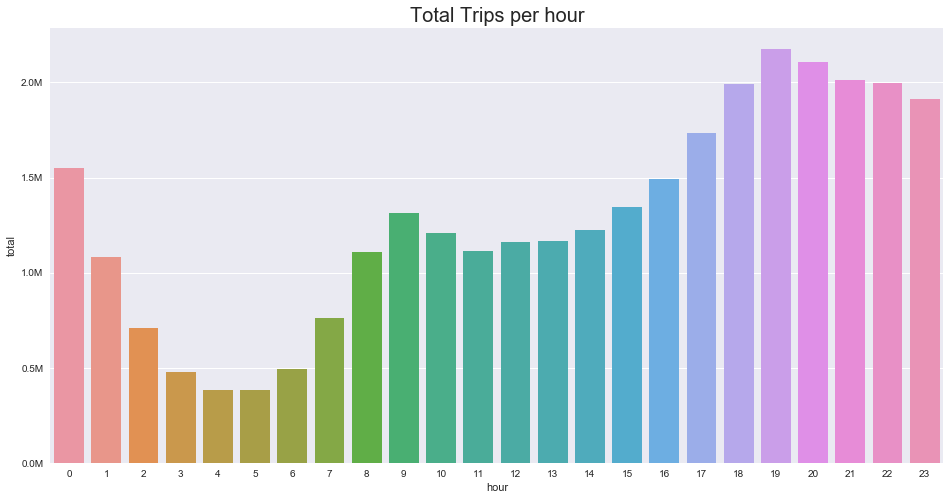

In [24]:
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm
#per hour
hours_seq = [i for i in range(24)]
def millions_format(x, pos):
    return '{:.1f}{}'.format(x * 1e-6, 'M')

fig = plt.figure(1,figsize = (16,8))
formatter = FuncFormatter(millions_format)
ax = sns.barplot(hours['hour'], hours['total'], order = hours_seq)
#ax1 = hours.plot(kind = 'bar',legend = False,figsize = (16,8),fontsize = 12,color = 'navy')
ax.yaxis.set_major_formatter(formatter)
plt.title('Total Trips per hour', fontsize= 20)
plt.show()

In [10]:
weeks = pd.read_sql_query('select dayofweek(pickup) weeks, count(*) total from uber group by weeks', db)

In [200]:
weeks

,weeks,total
0,1,4331195
1,2,3709227
2,3,4010434
3,4,4301537
4,5,4625511
5,6,4805002
6,7,5142832


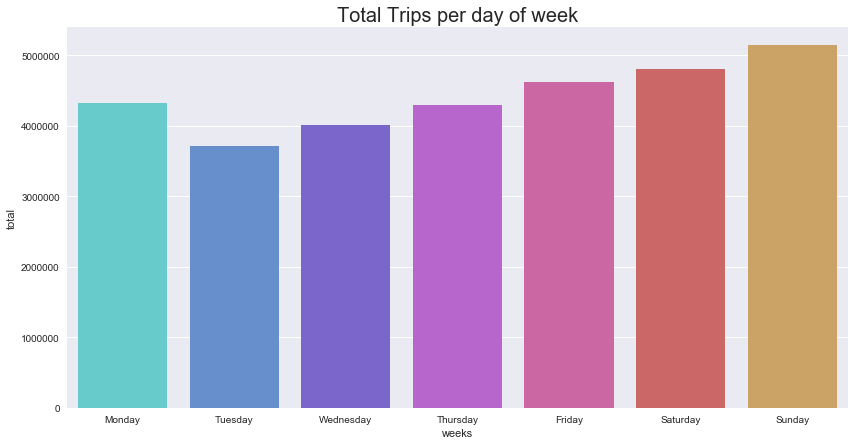

In [18]:
weekdays = pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], index=weeks.index)
weeks['weeks'] = weekdays
week_seq = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig = plt.figure(2,figsize = (14,7))
ax = sns.barplot(weeks['weeks'], weeks['total'], order = week_seq)
plt.title('Total Trips per day of week', fontsize= 20)
plt.show()

In [14]:
months = pd.read_sql_query('select month(pickup) months, count(*) total from uber group by months order by total desc', db)

In [21]:
months

,months,total
0,8,3368433
1,7,3274909
2,6,3258756
3,5,3102400
4,4,2799204
5,3,2745708
6,2,2612856
7,1,2335184
8,12,2137157
9,11,1984232


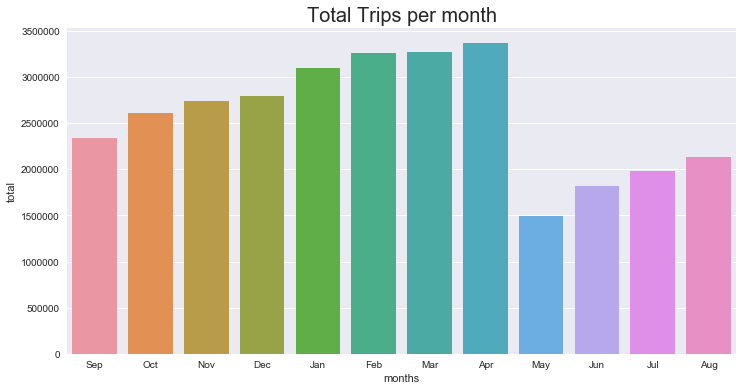

In [15]:
fig = plt.figure(3,figsize = (15,16))
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
fig = plt.figure(2,figsize = (12,6))
ax = sns.barplot(months['months'], months['total'])
ax.set_xticklabels(month_labels)
plt.title('Total Trips per month', fontsize= 20)
plt.show()

## Traffic Analysis

In [25]:
#worst traffic within a week
traff_w = pd.read_sql_query('select avg(distance/time_to_sec(duration)*3600) speed from uber group by dayofweek(pickup)', db)

In [26]:
traff_w

,speed
0,15.117161
1,14.342019
2,13.118135
3,13.025762
4,12.937346
5,12.808599
6,13.419659


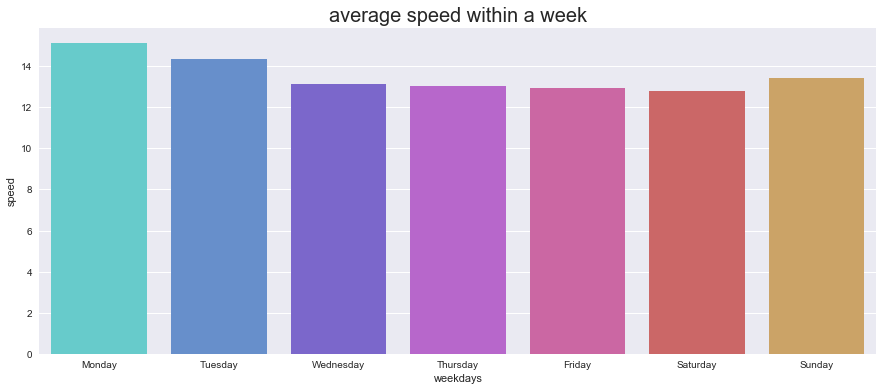

In [28]:
traff_w['weekdays'] = weekdays
fig = plt.figure(4,figsize = (15,6))
ax = sns.barplot(traff_w['weekdays'], traff_w['speed'],order = week_seq)
plt.title('average speed within a week', fontsize= 20)
plt.show()

In [29]:
#worst traffic within a day by hours
traff_h = pd.read_sql_query('select hour(pickup) hours,avg(distance/time_to_sec(duration)*3600) speed from uber group by hours', db)

In [31]:
traff_h.head()

,hours,speed
0,0,15.210115
1,1,15.920872
2,2,16.525050
3,3,17.265510
4,4,19.902109


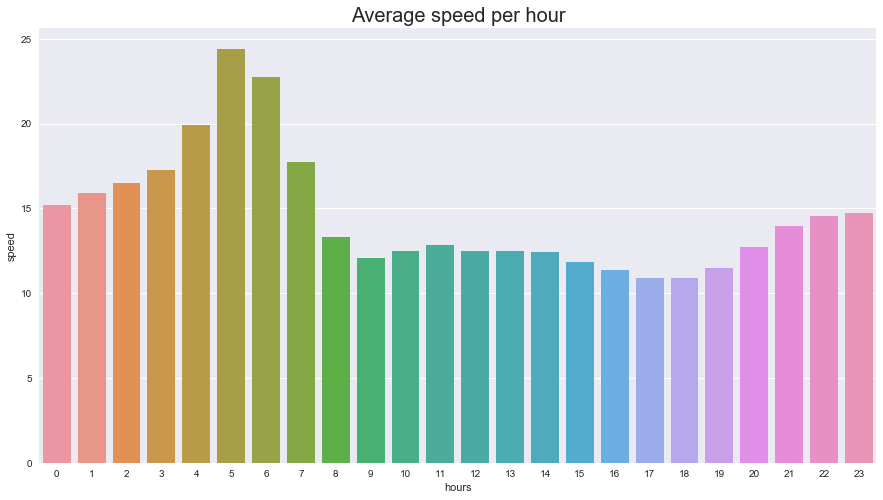

In [32]:
fig4 = plt.figure(5,figsize = (15,8))
ax = sns.barplot(traff_h['hours'], traff_h['speed'],order = hours_seq)
plt.title('Average speed per hour', fontsize= 20)
plt.show()

In [291]:
#Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic
weekday_speed = pd.read_sql_query('select hour(pickup) hours,\
avg(distance/time_to_sec(duration)*3600) speed from uber where dayofweek(pickup) not in (6,7) group by hours', db)

In [292]:
weekday_speed

,hours,speed
0,0,15.814440
1,1,16.375866
2,2,16.813516
3,3,17.515564
4,4,20.376885
5,5,24.961548
6,6,22.635825
7,7,17.340534
8,8,12.876685
9,9,11.671087


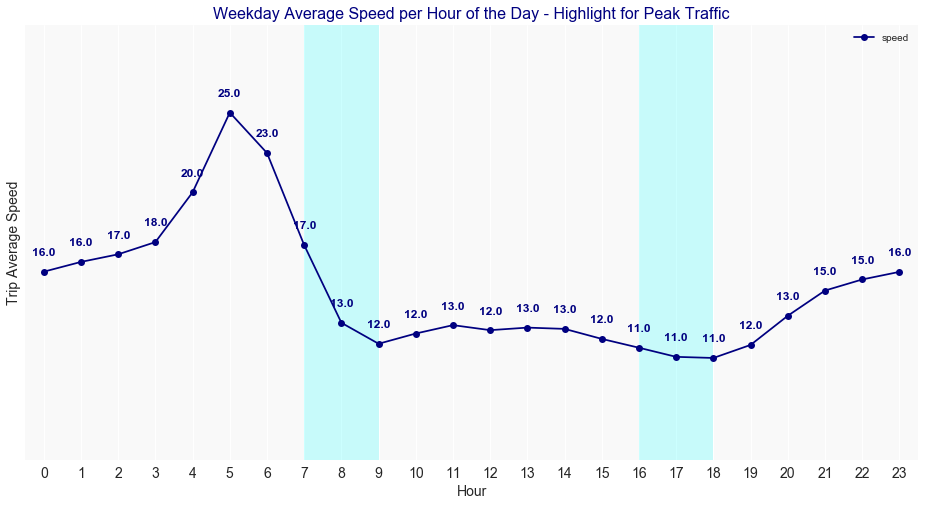

In [308]:
plt.figure(figsize =(14, 6))
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'top', 'color': 'navy', 'weight': 'bold'}

ax = weekday_speed.set_index('hours').plot(marker = 'o', color = 'navy',figsize =(16, 8))

for x, y in zip(weekday_speed.index, weekday_speed.values[:,1]):
    ax.annotate(round(y), xy=(x, y), xytext= (0, 24), textcoords='offset points', **kwargs)

ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([]) #hide tick labels on y-axis
plt.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
plt.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
plt.show()

In [33]:
#Demand of Rides per Month - Peak versus Off-Peak Hours
#7,8,9,16,17,18 in weekday is peak hour
trip_peak = pd.read_sql_query('select month(pickup) months, count(*) trip_peak from uber \
where dayofweek(pickup) not in (6,7) and hour(pickup) in (7,8,9,16,17,18) group by months', db)

In [34]:
trip_peak.head()

,months,trip_peak
0,1,430223
1,2,506730
2,3,546456
3,4,561256
4,5,550922


In [35]:
trip_offpeak = pd.read_sql_query('select month(pickup) months, count(*) trip_offpeak from uber \
where dayofweek(pickup) in (6,7) or hour(pickup) not in (7,8,9,16,17,18) group by months', db)

In [36]:
trip_offpeak.head()

,months,trip_offpeak
0,1,1904961
1,2,2106126
2,3,2199252
3,4,2237948
4,5,2551478


In [37]:
month = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
trip_peak['months'] = month
trip_offpeak['months'] = month
trips = trip_peak.set_index('months').join(trip_offpeak.set_index('months'))

In [39]:
trips.head()

,trip_peak,trip_offpeak
months,,
Jan,430223,1904961
Feb,506730,2106126
Mar,546456,2199252
Apr,561256,2237948
May,550922,2551478


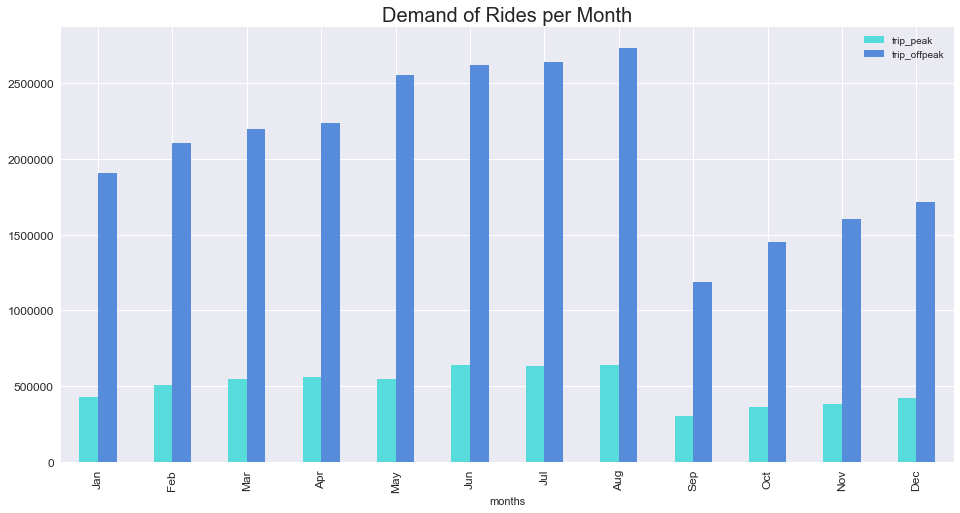

In [326]:
fig6 = plt.figure(6,figsize = (15,16))
ax = sns.factorplot(x='months', y='survival rate', hue='sex', data=df, kind='bar')
ax6 = trips.plot(kind = 'bar',legend = True,figsize = (16,8),fontsize = 12)
plt.title('Demand of Rides per Month', fontsize= 20)
plt.show()

## Value of the NYC Market for Uber and its Growth

In [28]:
#how much was the NYC market worth in the period
#Source: http://uberestimate.com/prices/New-York-City/ for Uber X
base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [29]:
market = pd.read_sql_query(f'select month(pickup) months,count(if({base_fare}+{per_minute}*time_to_sec(duration)/60 + \
{per_mile}*distance > 8,{base_fare}+{per_minute}*time_to_sec(duration)/60 + \
{per_mile}*distance,8)) cost from uber group by months', db)

In [38]:
market

,months,cost
0,1,2335184
1,2,2612856
2,3,2745708
3,4,2799204
4,5,3102400
5,6,3258756
6,7,3274909
7,8,3368433
8,9,1489476
9,10,1815571


In [46]:
def millions_currency(x, pos):
    return '{}{:.0f}{}'.format('$', x * 1e-5, 'M')

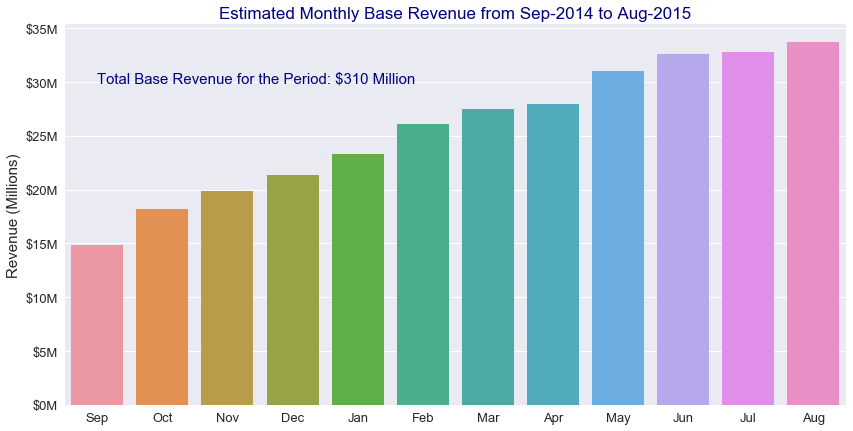

In [49]:
#Create chart showing total base revenue per month.
months_seq = [9,10,11,12,1,2,3,4,5,6,7,8]
formatter = FuncFormatter(millions_currency)
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
plt.figure(figsize = (14, 7))
ax = sns.barplot(market['months'], market['cost'], order = months_seq)
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

font = {'color': 'navy', 'size': 15} #text parameters
plt.text(0, 3000000, 'Total Base Revenue for the Period: $310 Million', #.format(market.sum()['cost'] * 1e-6), 
         fontdict = font) #params: x, y, text, fontdict
plt.xlabel('')
plt.ylabel('Revenue (Millions)', fontsize = 15)
plt.tick_params(labelsize=13)
plt.title('Estimated Monthly Base Revenue from Sep-2014 to Aug-2015', fontsize = 17, color='navy')

plt.show()

In [417]:
#how fast has Uber market grown in the period (month over month)
market = pd.read_sql_query(f'select month(pickup) months,count(if({base_fare}+{per_minute}*time_to_sec(duration)/60 + \
{per_mile}*distance > 8,{base_fare}+{per_minute}*time_to_sec(duration)/60 + \
{per_mile}*distance,8)) cost from uber group by year(pickup),months asc', db)

In [418]:
market

,months,cost
0,9,1489476
1,10,1815571
2,11,1984232
3,12,2137157
4,1,2335184
5,2,2612856
6,3,2745708
7,4,2799204
8,5,3102400
9,6,3258756


In [419]:
grown = market[:]
grown.index += 1

In [422]:
join_market = market.join(grown,how = 'left',lsuffix='_grown', rsuffix='_base')

In [426]:
join_market['growth'] = join_market['cost_grown'] - join_market['cost_base']

In [453]:
import math
growth = join_market[['months_grown','growth']]
growth.loc[pd.isnull(growth['growth']),'growth'] = 0
growth = growth.drop(growth.index[12])

C:\Users\Marti\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


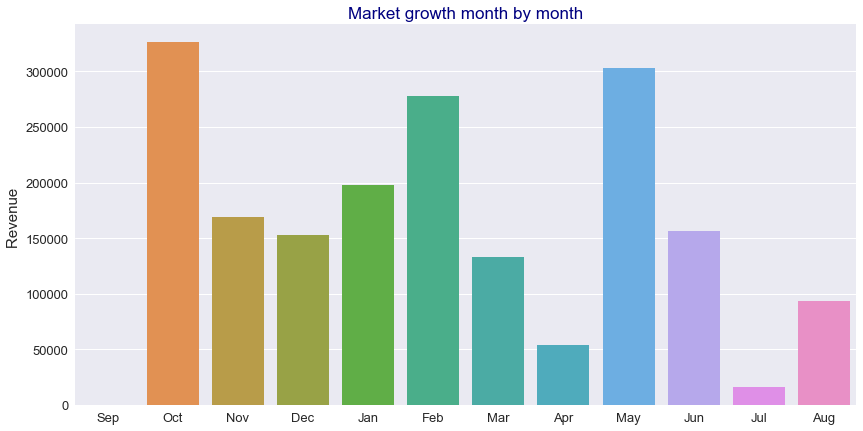

In [458]:
#Create chart showing total base revenue per month.
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
months_seq = [9,10,11,12,1,2,3,4,5,6,7,8]
plt.figure(figsize = (14, 7))
ax = sns.barplot(growth['months_grown'], growth['growth'], order = months_seq)
ax.set_xticklabels(month_labels)

font = {'color': 'navy', 'size': 15} #text parameters
plt.xlabel('')
plt.ylabel('Revenue ', fontsize = 15)
plt.tick_params(labelsize=13)
plt.title('Market growth month by month', fontsize = 17, color='navy')

plt.show()

In [460]:
trip_month = pd.read_sql_query('select month(pickup) months, count(*) total from uber group by year(pickup),months asc', db)

In [461]:
trip_month

,months,total
0,9,1489476
1,10,1815571
2,11,1984232
3,12,2137157
4,1,2335184
5,2,2612856
6,3,2745708
7,4,2799204
8,5,3102400
9,6,3258756


In [471]:
trip_grown = trip_month[:]
trip_grown.index += 1

In [472]:
join_trip = trip_month.join(trip_grown,how = 'left',lsuffix='_grown', rsuffix='_base')

In [473]:
join_trip['growth'] = (join_trip['total_grown'] - join_trip['total_base'])/join_trip['total_base']

In [474]:
growth_trip = join_trip[['months_grown','growth']]
growth_trip.loc[pd.isnull(growth_trip['growth']),'growth'] = 0
growth_trip = growth_trip.drop(growth_trip.index[12])

C:\Users\Marti\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [475]:
growth_trip

,months_grown,growth
0,9,0.000000
1,10,0.218933
2,11,0.092897
3,12,0.077070
4,1,0.092659
5,2,0.118908
6,3,0.050846
7,4,0.019483
8,5,0.108315
9,6,0.050398


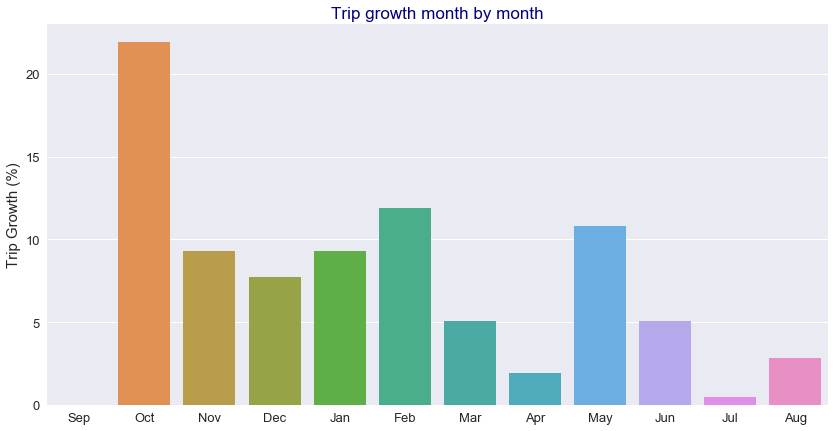

In [477]:
#Create chart showing total base revenue per month.
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
months_seq = [9,10,11,12,1,2,3,4,5,6,7,8]
plt.figure(figsize = (14, 7))
ax = sns.barplot(growth_trip['months_grown'], growth_trip['growth']*100, order = months_seq)
ax.set_xticklabels(month_labels)

font = {'color': 'navy', 'size': 15} #text parameters
plt.xlabel('')
plt.ylabel('Trip Growth (%)', fontsize = 15)
plt.tick_params(labelsize=13)
plt.title('Trip growth month by month', fontsize = 17, color='navy')

plt.show()

## Heatmap for Pickups

In [6]:
loc_uber = pd.read_sql_query('(select lat,lon from apr14) union (select lat,lon from aug14) union \
(select lat,lon from jun14) union (select lat,lon from jul14) union (select lat,lon from may14) union\
(select lat,lon from sep14)', db)

In [6]:
loc_uber.head()

,lat,lon
0,39.6569,-74.2258
1,39.6686,-74.1607
2,39.7214,-74.2446
3,39.8416,-74.1512
4,39.9055,-74.0791


In [7]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key="Google API key")   #Google API key removed for privacy purposes


In [8]:
fig = gmaps.figure()
heatmap=gmaps.heatmap_layer(loc_uber)
heatmap.max_intensity = 10
heatmap.point_radius = 0.5
fig.add_layer(heatmap)
fig

A Jupyter Widget

In [37]:
cursor.close()